# Nanog timelapse example

Note: The sample images have been rescaled and are 8-bit depth.

## Install and import the dependencies

In [1]:
# install the basicpy in case of Google Colaboratory
try:
    import google.colab

    %pip uninstall -yq basicpy
    %pip install --upgrade -q basicpy
except ModuleNotFoundError:
    pass

In [2]:
import pathlib
import skimage
import jax.numpy as jnp

from basicpy import BaSiC
from basicpy import datasets as bdata
from matplotlib import pyplot as plt

## Load the sample images

(128, 171)
uint8


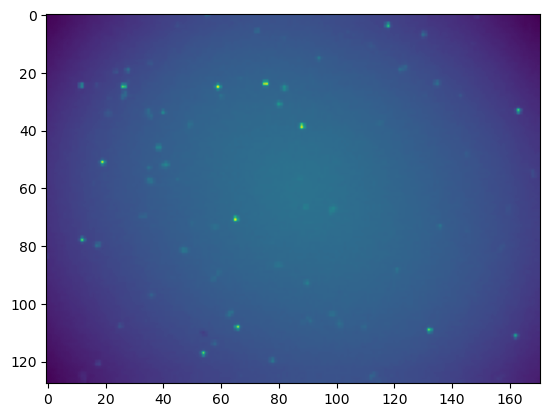

In [3]:
images = bdata.timelapse_nanog()
plt.imshow(images[10])

print(images[10].shape)
print(images[10].dtype)

## Fit the flatfield and darkfield (try 1)

Note: `smoothness_flatfield` is defaulted as 1. If you change from this default, make sure to change the `smoothness_darkfield` value as well (default = 1).

In [4]:
basic = BaSiC(get_darkfield=True, smoothness_flatfield=1)
basic.fit(images)

## Plot the fit results (try 1)

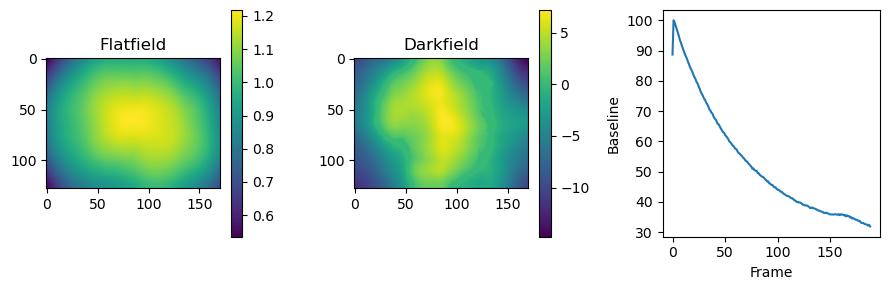

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(basic.flatfield)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(basic.darkfield)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()

For this first try, we can see that the `darkfield`, which represents the dark areas of the images is not very smooth and the middle section shows weird bumps. We want to have a `darkfield` that has smooth edges around the brighter areas.

## Fit the flatfield and darkfield (try 2)

In [6]:
# for this second try, we increase smoothness_darkfield to try and smooth out the lighter areas (see above)
basic = BaSiC(get_darkfield=True, smoothness_flatfield=1, smoothness_darkfield=5)
basic.fit(images)

## Plot the fit results (try 2)

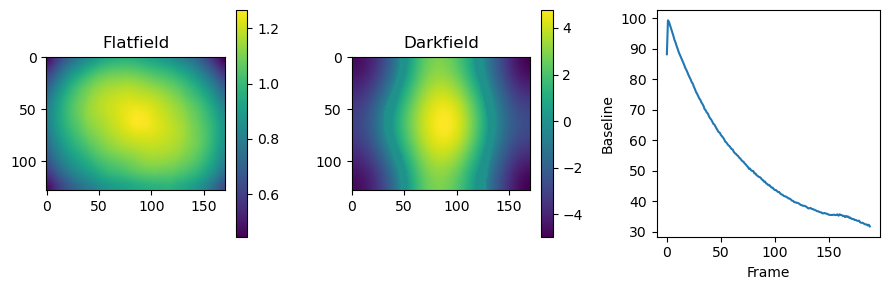

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(basic.flatfield)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(basic.darkfield)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()

After this second try, we see that the middle section of the `darkfield` has become smoother and the uneven illumination (dark areas) are more prominent. This is the optimal parameters for this dataset.

## Correct the original images with try 2 correction

Note: We use the `timelaspe` parameter, which will output the images_transformed as a JAX numpy array instead of normal numpy arrays. This will impact the output of the images later.

In [8]:
images_transformed = basic.transform(images, timelapse=True)

## Plot the corrected results

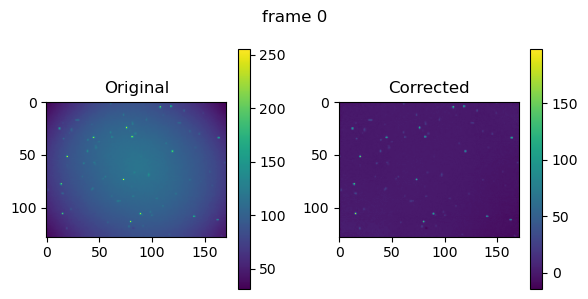

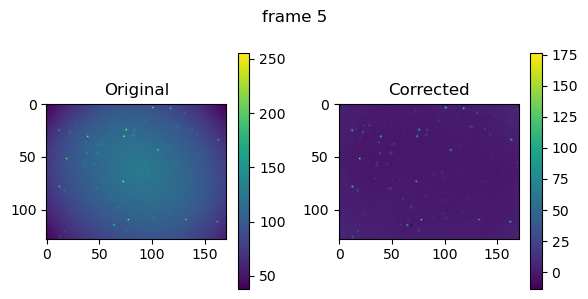

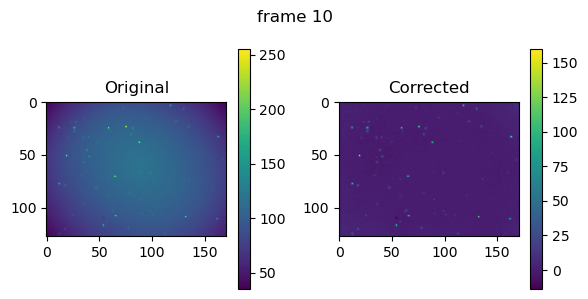

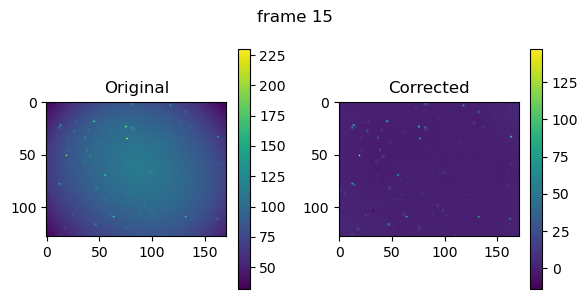

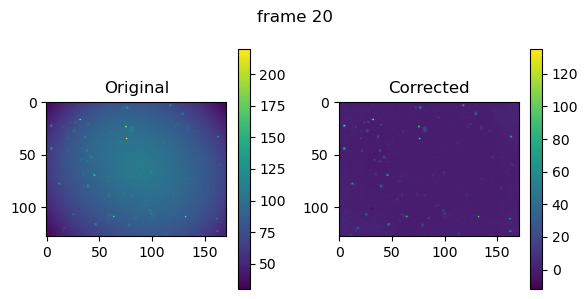

In [9]:
for i in range(0, 21, 5):
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    im = axes[0].imshow(images[i])
    fig.colorbar(im, ax=axes[0])
    axes[0].set_title("Original")
    im = axes[1].imshow(images_transformed[i])
    fig.colorbar(im, ax=axes[1])
    axes[1].set_title("Corrected")
    fig.suptitle(f"frame {i}")
    fig.tight_layout()

## Important!

Images after transformation are in 32-bit and are in JAX numpy format. If this differs from the original image bit-depth, include a conversion below for the tuple of JAX arrays:

**8-bit**
```python
# makes the negatives 0
images_transformed = jnp.maximum(images_transformed, 0)
# normalize the data to 0 - 1
images_transformed = images_transformed / jnp.max(images_transformed)

# scale by 255 (2^8 - 1) for 8-bit conversion
images_transformed = 255 * images_transformed

# round the values to integers and then convert to 8-bit data type
corrected_transformed_images = images_transformed.round().astype(jnp.uint8)
```

**16-bit**
```python
# makes the negatives 0
images_transformed = jnp.maximum(images_transformed, 0)
# normalize the data to 0 - 1
images_transformed = images_transformed / jnp.max(images_transformed)

# scale by 65535 (2^16 - 1) for 16-bit conversion
images_transformed = 65535 * images_transformed

# round the values to integers and then convert to 16-bit data type
corrected_transformed_images = images_transformed.round().astype(jnp.uint16)
```

## Output images (Optional)

Note: Must use `skimage.io.imsave` to output the images.

In [10]:
# set output directory for images
output_dir = pathlib.Path("./tmpdir")
output_dir.mkdir(exist_ok=True)

# Convert the images to 8-bit like the original images
# makes the negatives 0
images_transformed = jnp.maximum(images_transformed, 0)
# normalize the data to 0 - 1
images_transformed = images_transformed / jnp.max(images_transformed)

# scale by 255 (2^8 - 1) for 8-bit conversion
images_transformed = 255 * images_transformed

# round the values to integers and then convert to 8-bit data type
corrected_transformed_images = images_transformed.round().astype(jnp.uint8)

for i, image in enumerate(corrected_transformed_images):
        image_filename = f"{output_dir}/image_{i}.tif"  # You can change this to output the original names
        skimage.io.imsave(image_filename, image)

/tmp/ipykernel_138120/259087926.py:19: UserWarning: tmpdir/image_0.tif is a low contrast image
  skimage.io.imsave(image_filename, image)
/tmp/ipykernel_138120/259087926.py:19: UserWarning: tmpdir/image_1.tif is a low contrast image
  skimage.io.imsave(image_filename, image)
/tmp/ipykernel_138120/259087926.py:19: UserWarning: tmpdir/image_2.tif is a low contrast image
  skimage.io.imsave(image_filename, image)
/tmp/ipykernel_138120/259087926.py:19: UserWarning: tmpdir/image_3.tif is a low contrast image
  skimage.io.imsave(image_filename, image)
/tmp/ipykernel_138120/259087926.py:19: UserWarning: tmpdir/image_4.tif is a low contrast image
  skimage.io.imsave(image_filename, image)
/tmp/ipykernel_138120/259087926.py:19: UserWarning: tmpdir/image_5.tif is a low contrast image
  skimage.io.imsave(image_filename, image)
/tmp/ipykernel_138120/259087926.py:19: UserWarning: tmpdir/image_6.tif is a low contrast image
  skimage.io.imsave(image_filename, image)
/tmp/ipykernel_138120/259087926.py